# Project Name : Telecome Churn

In the telecom industry, "churn" refers to the rate at which customers discontinue their services with a telecom operator. It is also called the "customer attrition rate". Essentially, it measures how many customers stop using a specific service within a certain period of time.


Churn is a critical metric for telecom companies as it indicates customer loyalty and satisfaction. High churn rates can negatively impact a company's profitability and growth by reducing their customer base. Understanding and reducing churn is key to ensuring long-term success.

1. Telecom churn means customers leaving a telecom service.
2. The churn rate is the percentage of customers who leave within a certain time.
3. It helps companies know if customers are happy or not happy with their service.
4. High churn is bad because it means the company is losing customers.


●	 21 columsns :

●	state: Categorical, for the 51 states and the District of Columbia.

●	Area.code

●	account.length: how long the account has Business Objective

●	been active.

●	voice.plan: yes or no, voicemail plan.

●	voice.messages: number of voicemail messages.

●	intl.plan: yes or no, international plan.

●	intl.mins: minutes customer used service to make international calls.

●	intl.calls: total number of international calls.

●	intl.charge: total international charge.

●	day.mins: minutes customer used service during the day.

●	day.calls: total number of calls during the day.

●	day.charge: total charge during the day.

●	eve.mins: minutes customer used service during the evening.

●	eve.calls: total number of calls during the evening.

●	eve.charge: total charge during the evening.

●	night.mins: minutes customer used service during the night.

●	night.calls: total number of calls during the night.

●	night.charge: total charge during the night.

●	customer.calls: number of calls to customer service.

●	churn: Categorical, yes or no. Indicator of whether the customer has left the company (yes or no).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Telecome Churn/Churn.xlsx'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
data = pd.read_excel(file_path)

In [ ]:
data1 = data.copy()

In [ ]:
# data1.info()
# RangeIndex: 5000 entries, 0 to 4999 (Rows)
# Data columns (total 21 columns):

In [ ]:
data.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


# EDA

In [ ]:
### Step 1: Data Cleaning

In [ ]:
# Step 1: Data Cleaning
# Drop irrelevant column
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
# Convert necessary columns to numeric
data['day.charge'] = pd.to_numeric(data['day.charge'], errors='coerce')
data['eve.mins'] = pd.to_numeric(data['eve.mins'], errors='coerce')

# errors = 'coerce' : This argument tells the function how to handle errors if it encounters values that cannot be converted to numbers.
# 'coerce' means it will replace any such values with NaN (Not a Number), which is a way to represent missing or invalid data in pandas.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

In [ ]:
# data1.isnull().sum()
missing_values

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


### Step 2: Data Overview

In [ ]:
# Step 2: Data Overview
# Summary statistics
summary = data.describe()

In [ ]:
summary

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000
mean,100.206681,7.754880,10.264198,4.433085,2.771851,180.306178,100.021936,30.652604,200.617368,100.174884,17.052695,200.434675,99.954518,9.019670,1.571946
std,39.695476,13.545738,2.761996,2.459495,0.745672,53.931206,19.835965,9.168275,50.550590,19.833572,4.296784,50.528158,19.959015,2.273776,1.307458
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.400000,87.000000,14.140000,167.100000,87.000000,7.520000,1.000000
50%,100.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.000000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,113.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.000000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [ ]:
# Distribution of churn
churn_distribution = data['churn'].value_counts()

In [ ]:
churn_distribution

,count
churn,
no,4264
yes,705


### Step 3: Data Visualization

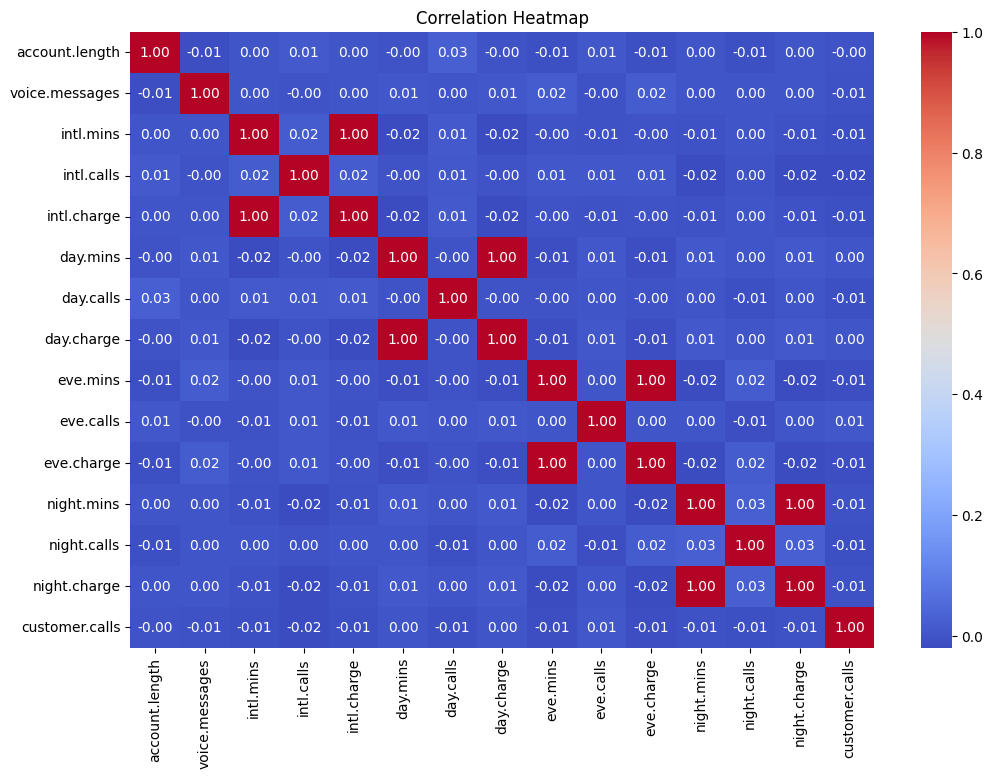

In [ ]:
# Step 3: Data Visualization
# Correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
corr = numerical_data.corr()


sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1400x600 with 0 Axes>

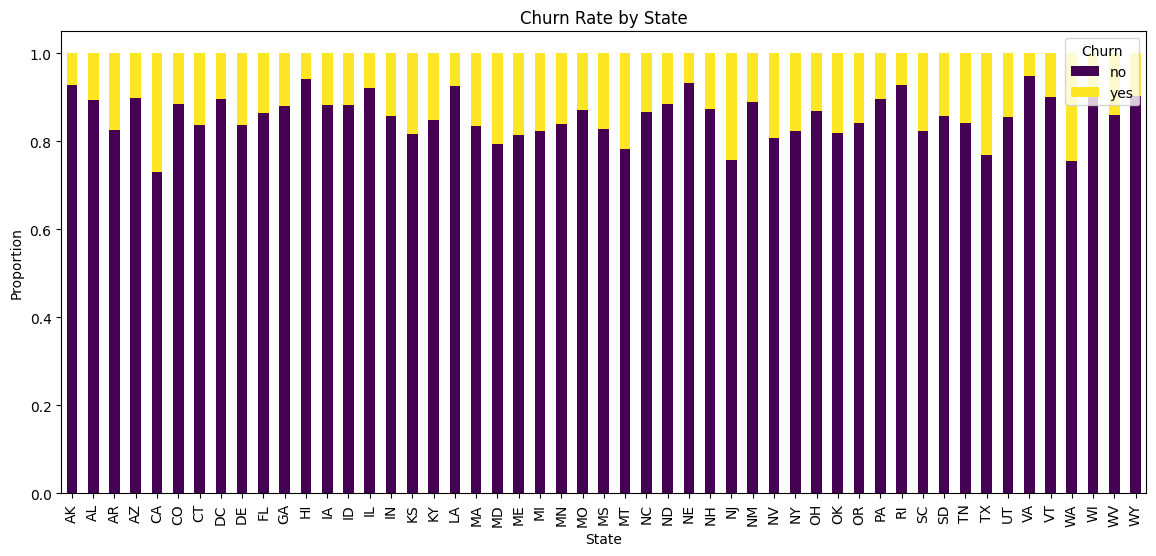

In [ ]:
# Churn by state
plt.figure(figsize=(14, 6))
state_churn = data.groupby('state')['churn'].value_counts(normalize=True).unstack()

state_churn.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='viridis')

plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.legend(title='Churn', loc='upper right')
plt.show()

<ipython-input-21-0015da8735af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='day.charge', data=data, palette='Set2')


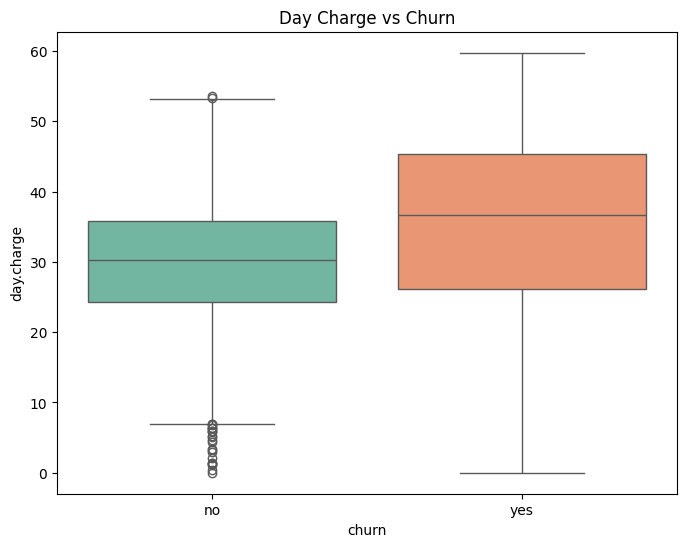

In [ ]:
# Boxplot: Day charge vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='day.charge', data=data, palette='Set2')
plt.title('Day Charge vs Churn')
plt.show()

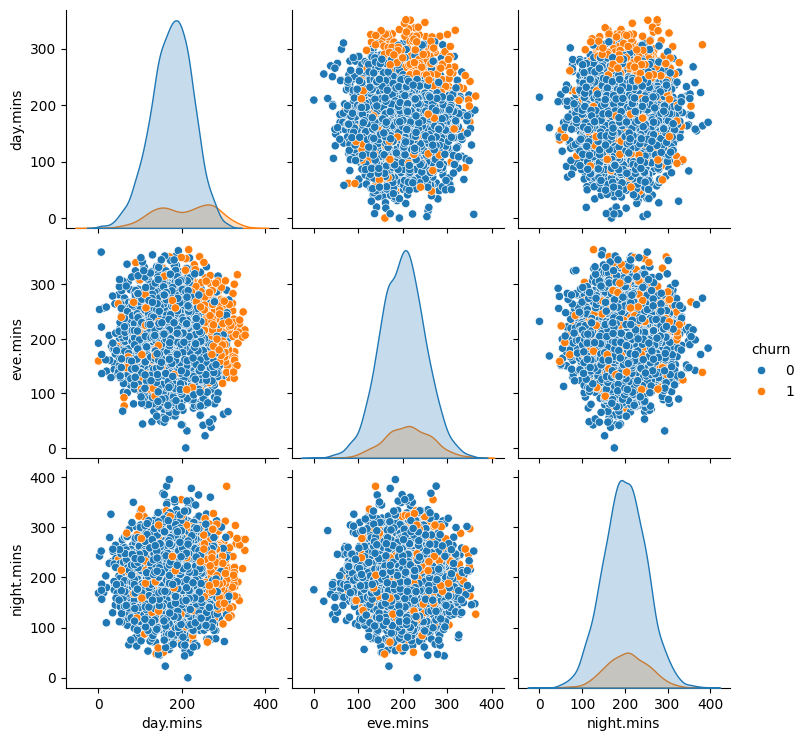

In [ ]:
# Pair Plot
sns.pairplot(data[['day.mins', 'eve.mins', 'night.mins', 'churn']], hue='churn')
plt.show()

In [ ]:
# Save cleaned data for future use
import os


# Define the directory and file path
cleaned_file_path = '/mnt/data/Cleaned_Churn.csv'
directory = os.path.dirname(cleaned_file_path)  # Extract the directory path

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Now save the data to the CSV file
data.to_csv(cleaned_file_path, index=False)

print("Data cleaning and EDA completed. Cleaned data saved to:", cleaned_file_path)

Data cleaning and EDA completed. Cleaned data saved to: /mnt/data/Cleaned_Churn.csv


# Feature Engineering Section

In [ ]:
# Feature Engineering Section
# Step 4: Feature Engineering
# Create new features
data['total.mins'] = data['day.mins'] + data['eve.mins'] + data['night.mins'] + data['intl.mins']
data['total.calls'] = data['day.calls'] + data['eve.calls'] + data['night.calls'] + data['intl.calls']
data['avg.charge.per.call'] = (data['day.charge'] + data['eve.charge'] + data['night.charge'] + data['intl.charge']) / data['total.calls']


In [ ]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,...,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total.mins,total.calls,avg.charge.per.call
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,...,99,16.78,244.7,91,11.01,1,no,717.2,303,0.249373
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,...,103,16.62,254.4,103,11.45,1,no,625.2,332,0.178434
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,...,110,10.30,162.6,104,7.32,0,no,539.4,333,0.187057
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,...,88,5.26,196.9,89,8.86,2,no,564.8,255,0.261961
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,...,122,12.61,186.9,121,8.41,3,no,512.0,359,0.145097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,...,126,18.96,297.5,116,13.39,2,no,766.1,374,0.200775
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,...,73,21.83,213.6,113,9.61,3,yes,669.3,278,0.240000
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,...,128,14.69,212.4,97,9.56,1,no,539.4,318,0.162956
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,...,92,14.59,224.4,89,10.10,0,no,593.4,254,0.232638


### Encode categorical variables

In [ ]:
# Encode categorical variables
data['voice.plan'] = data['voice.plan'].map({'yes': 1, 'no': 0})
data['intl.plan'] = data['intl.plan'].map({'yes': 1, 'no': 0})
data['churn'] = data['churn'].map({'yes': 1, 'no': 0})


In [ ]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,...,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total.mins,total.calls,avg.charge.per.call
0,KS,area_code_415,128,1,25,0,10.0,3,2.70,265.1,...,99,16.78,244.7,91,11.01,1,0,717.2,303,0.249373
1,OH,area_code_415,107,1,26,0,13.7,3,3.70,161.6,...,103,16.62,254.4,103,11.45,1,0,625.2,332,0.178434
2,NJ,area_code_415,137,0,0,0,12.2,5,3.29,243.4,...,110,10.30,162.6,104,7.32,0,0,539.4,333,0.187057
3,OH,area_code_408,84,0,0,1,6.6,7,1.78,299.4,...,88,5.26,196.9,89,8.86,2,0,564.8,255,0.261961
4,OK,area_code_415,75,0,0,1,10.1,3,2.73,166.7,...,122,12.61,186.9,121,8.41,3,0,512.0,359,0.145097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,1,40,0,9.9,5,2.67,235.7,...,126,18.96,297.5,116,13.39,2,0,766.1,374,0.200775
4996,WV,area_code_415,152,0,0,0,14.7,2,3.97,184.2,...,73,21.83,213.6,113,9.61,3,1,669.3,278,0.240000
4997,DC,area_code_415,61,0,0,0,13.6,4,3.67,140.6,...,128,14.69,212.4,97,9.56,1,0,539.4,318,0.162956
4998,DC,area_code_510,109,0,0,0,8.5,6,2.30,188.8,...,92,14.59,224.4,89,10.10,0,0,593.4,254,0.232638


In [ ]:
# Save cleaned and engineered data for future use
engineered_file_path = '/mnt/data/Engineered_Churn.csv'
data.to_csv(engineered_file_path, index=False)

print("EDA completed. Feature Engineering completed. Data saved to:", engineered_file_path)

EDA completed. Feature Engineering completed. Data saved to: /mnt/data/Engineered_Churn.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [ ]:
# Select only numerical features for scaling
numerical_features = data.select_dtypes(include=['number']).drop(columns=['churn'])

In [ ]:
# Define features and target
X = numerical_features
y = data['churn']

### Split

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [ ]:
# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Model Accuracy: 0.954728370221328
Confusion Matrix:
 [[829   4]
 [ 41 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       833
           1       0.97      0.75      0.84       161

    accuracy                           0.95       994
   macro avg       0.96      0.87      0.91       994
weighted avg       0.96      0.95      0.95       994



# Feedback based on model performance

In [ ]:
# Feedback based on model performance
if accuracy > 0.85:
    print("Great model performance! Consider fine-tuning hyperparameters for further improvement.")
elif accuracy > 0.75:
    print("Good performance, but there is room for improvement. Try feature selection or different algorithms.")
else:
    print("The model needs improvement. Consider engineering new features or using more complex models.")

Great model performance! Consider fine-tuning hyperparameters for further improvement.
